In [1]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn import metrics
from sklearn.metrics import roc_auc_score
import ipywidgets as widgets
from IPython.display import display
from IPython.display import clear_output

from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("Master Hockey Data.csv")

In [3]:
to_drop = ['TOI/GP','S%','FOW%', "S"]
df.drop(to_drop, inplace=True, axis=1)

In [4]:
# df.head()
# need to remove index 2484 because it shows as a float and messes everything up
indexRemove = df[df['S/C'] == "--" ].index
df.drop(indexRemove , inplace=True)
df.drop(df.index[2484], inplace = True)

In [5]:
encoder = preprocessing.LabelEncoder() #changes non numerical labels to numerical ones
data = df.values #creates dataframe of all values
values = encoder.fit_transform(data[:,1]) #encodes non numerical labels

data[:,1] = values 


In [6]:
values = encoder.fit_transform(data[:, 2])

In [7]:
data[:,2] = values


In [8]:
def myFunc(str):
    if str == "--" or type(str) == 'float':
        return "0"
    return str.replace(",","") #replaces invalid data

vFunc = np.vectorize(myFunc)
cols = [3,5,6,8,10,11,12,13,14,15]
for col in cols:
    data[:, col] = vFunc(data[:,col]).astype(float)
data[0,:]

array(['Wayne Gretzky', 0, 0, 1487.0, 894.0, 1963.0, 2857.0, 520.0, 577.0,
       1.92, 617.0, 1818.0, 204.0, 890.0, 73.0, 149.0, 2.0, 91.0],
      dtype=object)

In [9]:
my_data = pd.read_csv("Master HOF Data.csv")
hof_names = my_data["Player"].tolist()

    

In [10]:
labels = []
for i in range(np.shape(data)[0]):
    if data[i,0] in hof_names:
        labels.append(1)
    else:
        labels.append(0)

In [11]:
X_train, X_test, Y_train, Y_test = train_test_split(data[:, 1:], labels , test_size=0.30)

In [12]:
model = tree.DecisionTreeClassifier()
model.fit(X_train, Y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [13]:
pred = model.predict(X_test)
print("Accuracy:",metrics.accuracy_score(Y_test, pred))

Accuracy: 0.9537166900420757


In [14]:
print("Precision:", metrics.precision_score(Y_test, pred))

Precision: 0.4153846153846154


In [15]:
print("Classification Report:", metrics.classification_report(Y_test, pred))
print("F1 Score: ", metrics.f1_score(Y_test, pred))
print("Hamming Loss: ", metrics.hamming_loss(Y_test, pred))

Classification Report:               precision    recall  f1-score   support

           0       0.98      0.97      0.98      1371
           1       0.42      0.49      0.45        55

    accuracy                           0.95      1426
   macro avg       0.70      0.73      0.71      1426
weighted avg       0.96      0.95      0.96      1426

F1 Score:  0.45
Hamming Loss:  0.04628330995792426


NameError: name 'fig' is not defined

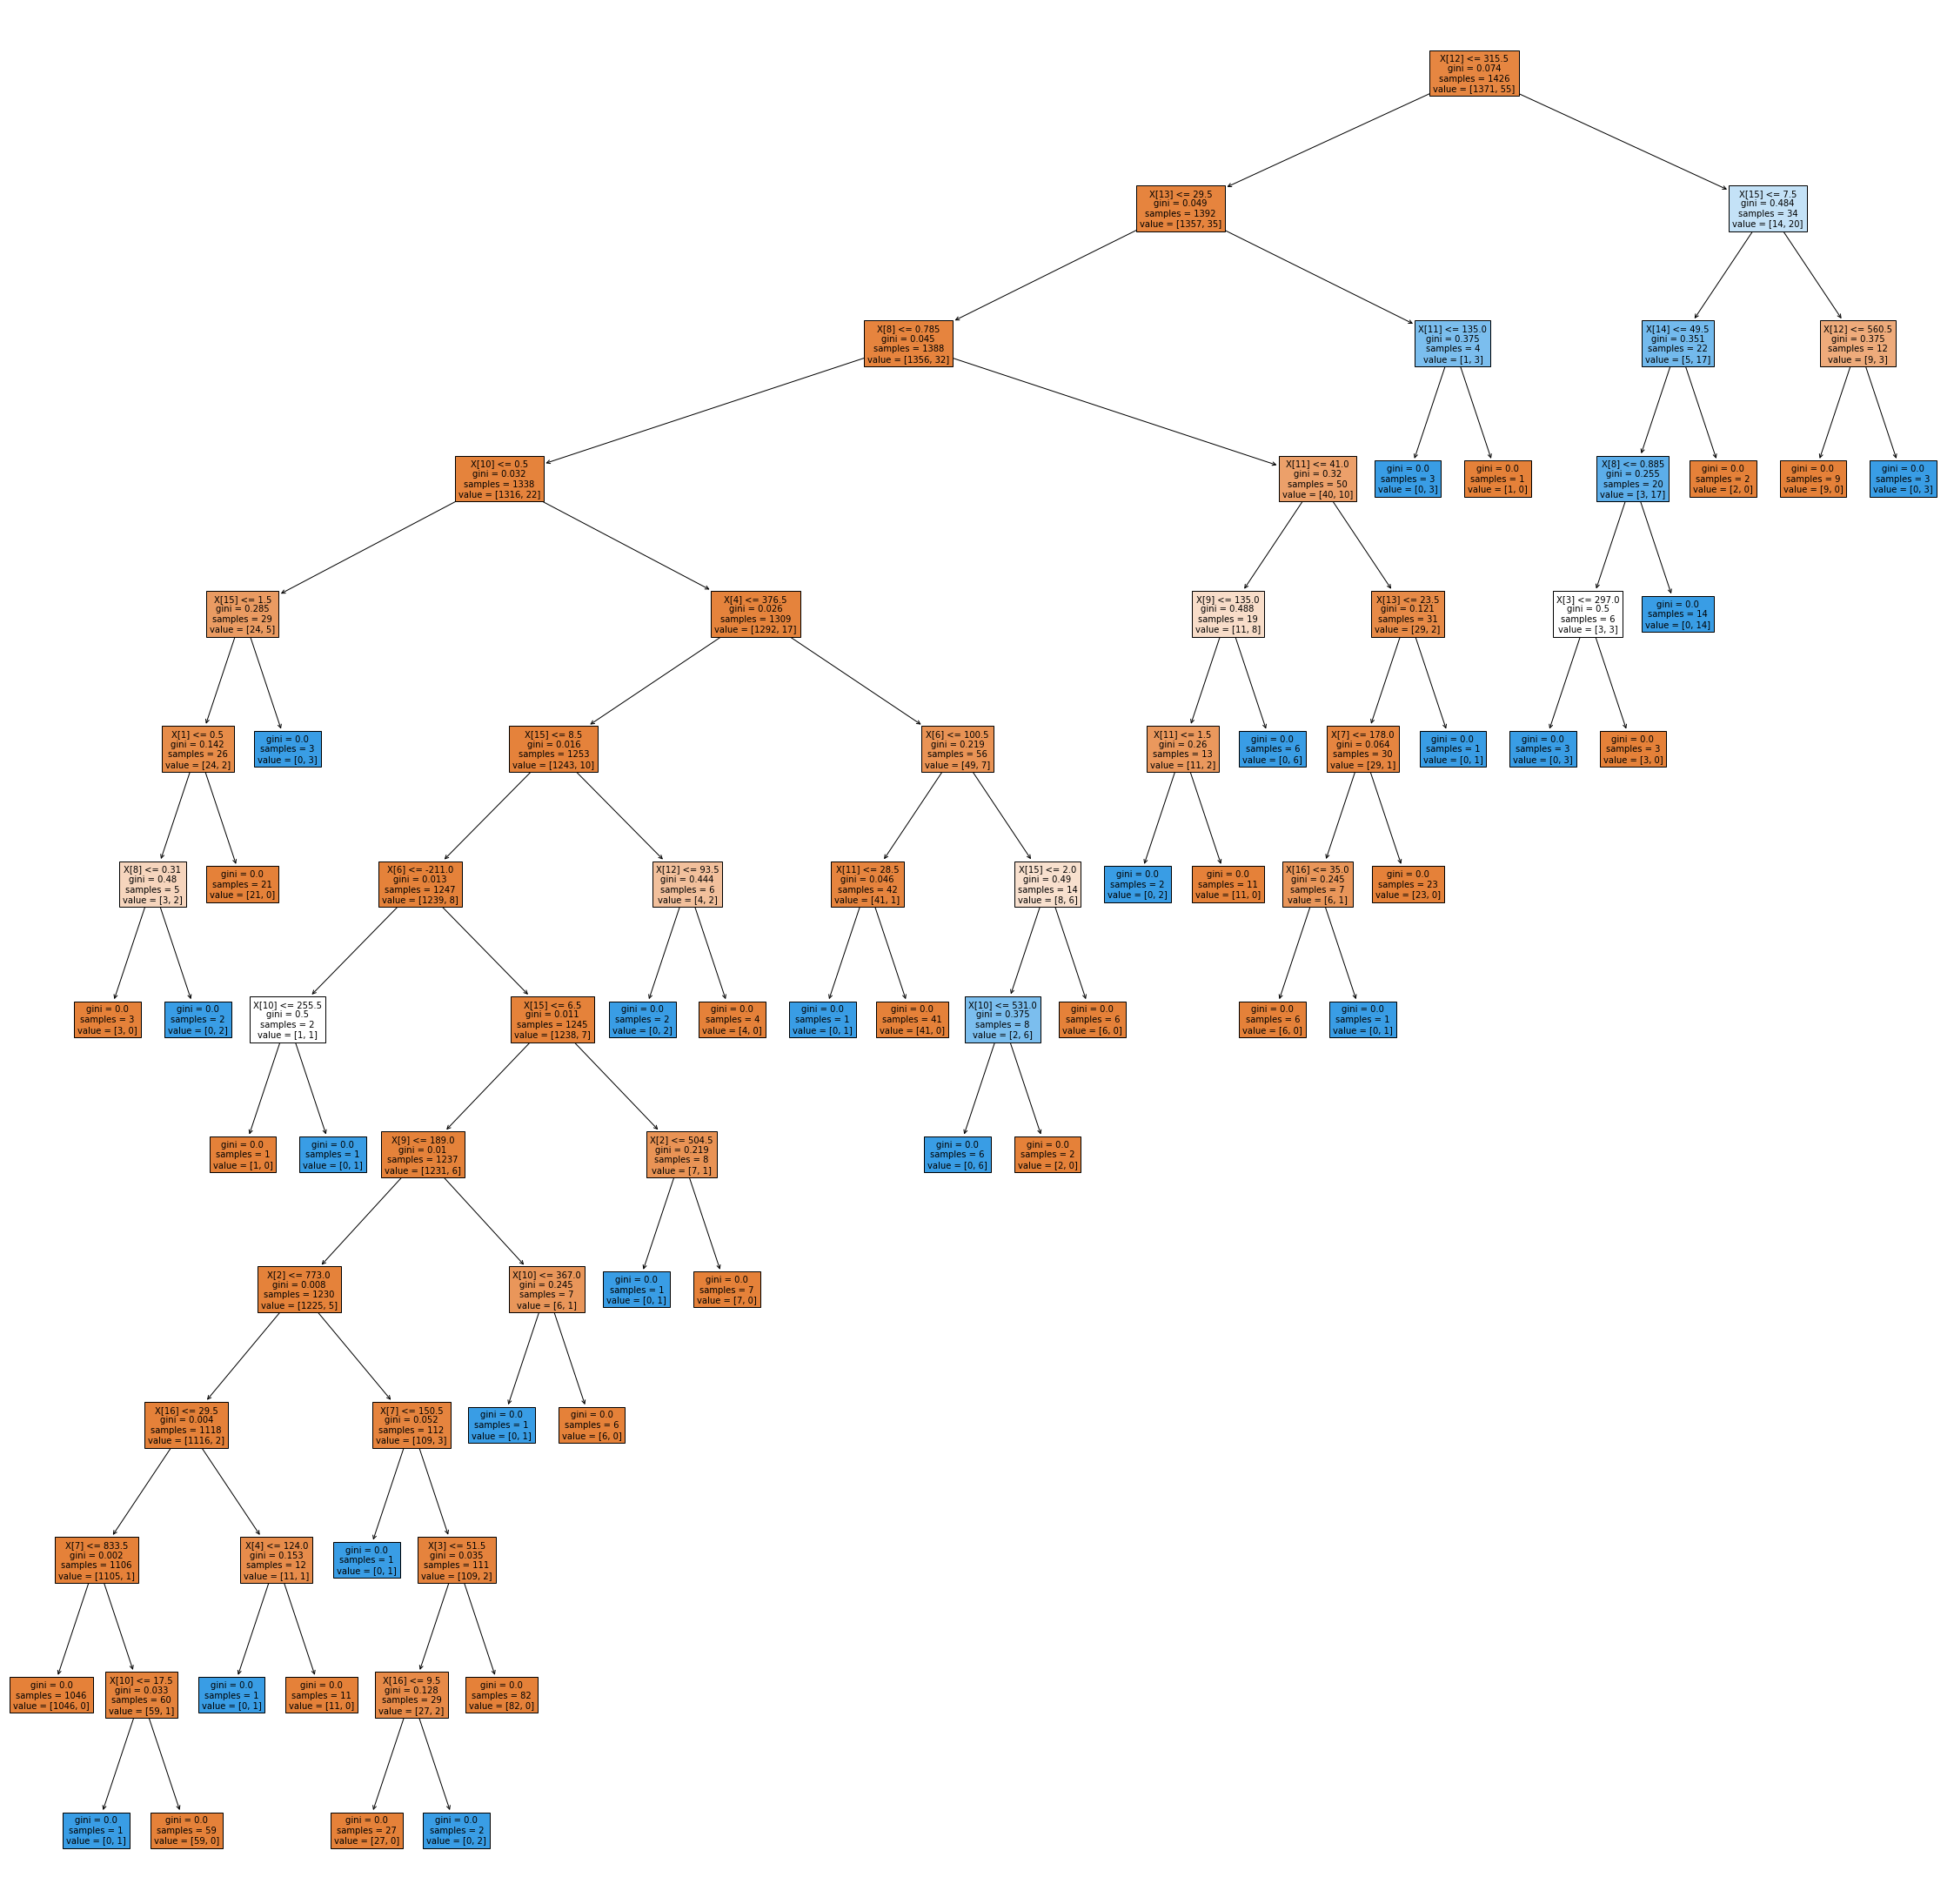

In [27]:
plt.figure(figsize=(40,40))
tree.plot_tree(model.fit(X_test, Y_test), filled=True, fontsize=10)
plt.close(fig)


In [17]:
#create with 100 trees
modelr = RandomForestClassifier(n_estimators=100, 
                               bootstrap = True,
                               max_features = 'sqrt')
modelr.fit(X_train, Y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [18]:
predr = modelr.predict(X_test)
print("Accuracy:",metrics.accuracy_score(Y_test, predr))
print("Precision:", metrics.precision_score(Y_test, predr))

Accuracy: 0.97054698457223
Precision: 0.696969696969697


In [19]:
print("Classification Report:", metrics.classification_report(Y_test, predr))
print("F1 Score: ", metrics.f1_score(Y_test, predr))
print("Hamming Loss: ", metrics.hamming_loss(Y_test, predr))

Classification Report:               precision    recall  f1-score   support

           0       0.98      0.99      0.98      1371
           1       0.70      0.42      0.52        55

    accuracy                           0.97      1426
   macro avg       0.84      0.71      0.75      1426
weighted avg       0.97      0.97      0.97      1426

F1 Score:  0.5227272727272727
Hamming Loss:  0.029453015427769985


In [20]:
rf_probs = modelr.predict_proba(X_test)[:, 1]
# Calculate roc auc
roc_value = roc_auc_score(Y_test, rf_probs)
print("ROC value:", roc_value)

ROC value: 0.9661892447450434


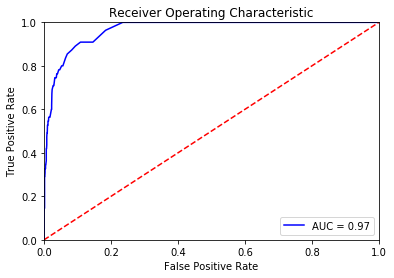

In [21]:

    fpr, tpr, threshold = metrics.roc_curve(Y_test, rf_probs)
    roc_auc = metrics.auc(fpr, tpr)
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()



In [22]:
output_model = widgets.Output()
plotout = widgets.Output()
modelList = ['Choose','Decision Tree', 'Random Forest', 'ROC Info']
dropdownModel = widgets.Dropdown(options = modelList)


In [23]:
def dropdown_model_eventhandler(change):
    output_model.clear_output()
    plotout.clear_output()
    with output_model:
        if (change.new == 'Choose' ):
            print("Please choose model from Dropdown menu")
        elif(change.new == 'Decision Tree'):
                print("Accuracy:",metrics.accuracy_score(Y_test, pred))
                print("Precision:", metrics.precision_score(Y_test, pred))
                print("Classification Report:", metrics.classification_report(Y_test, pred))
                print("F1 Score: ", metrics.f1_score(Y_test, pred))
                print("Hamming Loss: ", metrics.hamming_loss(Y_test, pred))
        elif(change.new == 'Random Forest'):
            print("Accuracy:",metrics.accuracy_score(Y_test, predr))
            print("Precision:", metrics.precision_score(Y_test, predr))
            print("Classification Report:", metrics.classification_report(Y_test, predr))
            print("F1 Score: ", metrics.f1_score(Y_test, predr))
            print("Hamming Loss: ", metrics.hamming_loss(Y_test, predr))
        elif(change.new == 'ROC Info'):
            print("ROC value:", roc_value)
    with plotout:
        if(change.new == 'Choose'):
            print("Please choose a model from Dropdown menu")
        elif(change.new == 'Decision Tree'):
            plt.figure(figsize=(40,40))
            tree.plot_tree(model.fit(X_test, Y_test), filled=True, fontsize=10)
            plt.close(fig)
        elif(change.new == 'ROC Info' ):
            
            fpr, tpr, threshold = metrics.roc_curve(Y_test, rf_probs)
            roc_auc = metrics.auc(fpr, tpr)
            plt.title('Receiver Operating Characteristic')
            plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
            plt.legend(loc = 'lower right')
            plt.plot([0, 1], [0, 1],'r--')
            plt.xlim([0, 1])
            plt.ylim([0, 1])
            plt.ylabel('True Positive Rate')
            plt.xlabel('False Positive Rate')
            plt.show()
            print("ROC CURVE")
        

In [24]:
dropdownModel.observe(dropdown_model_eventhandler, names='value')




In [25]:
tab = widgets.Tab([output_model, plotout])
tab.set_title(0, 'Model Data')
tab.set_title(1, 'Plots')



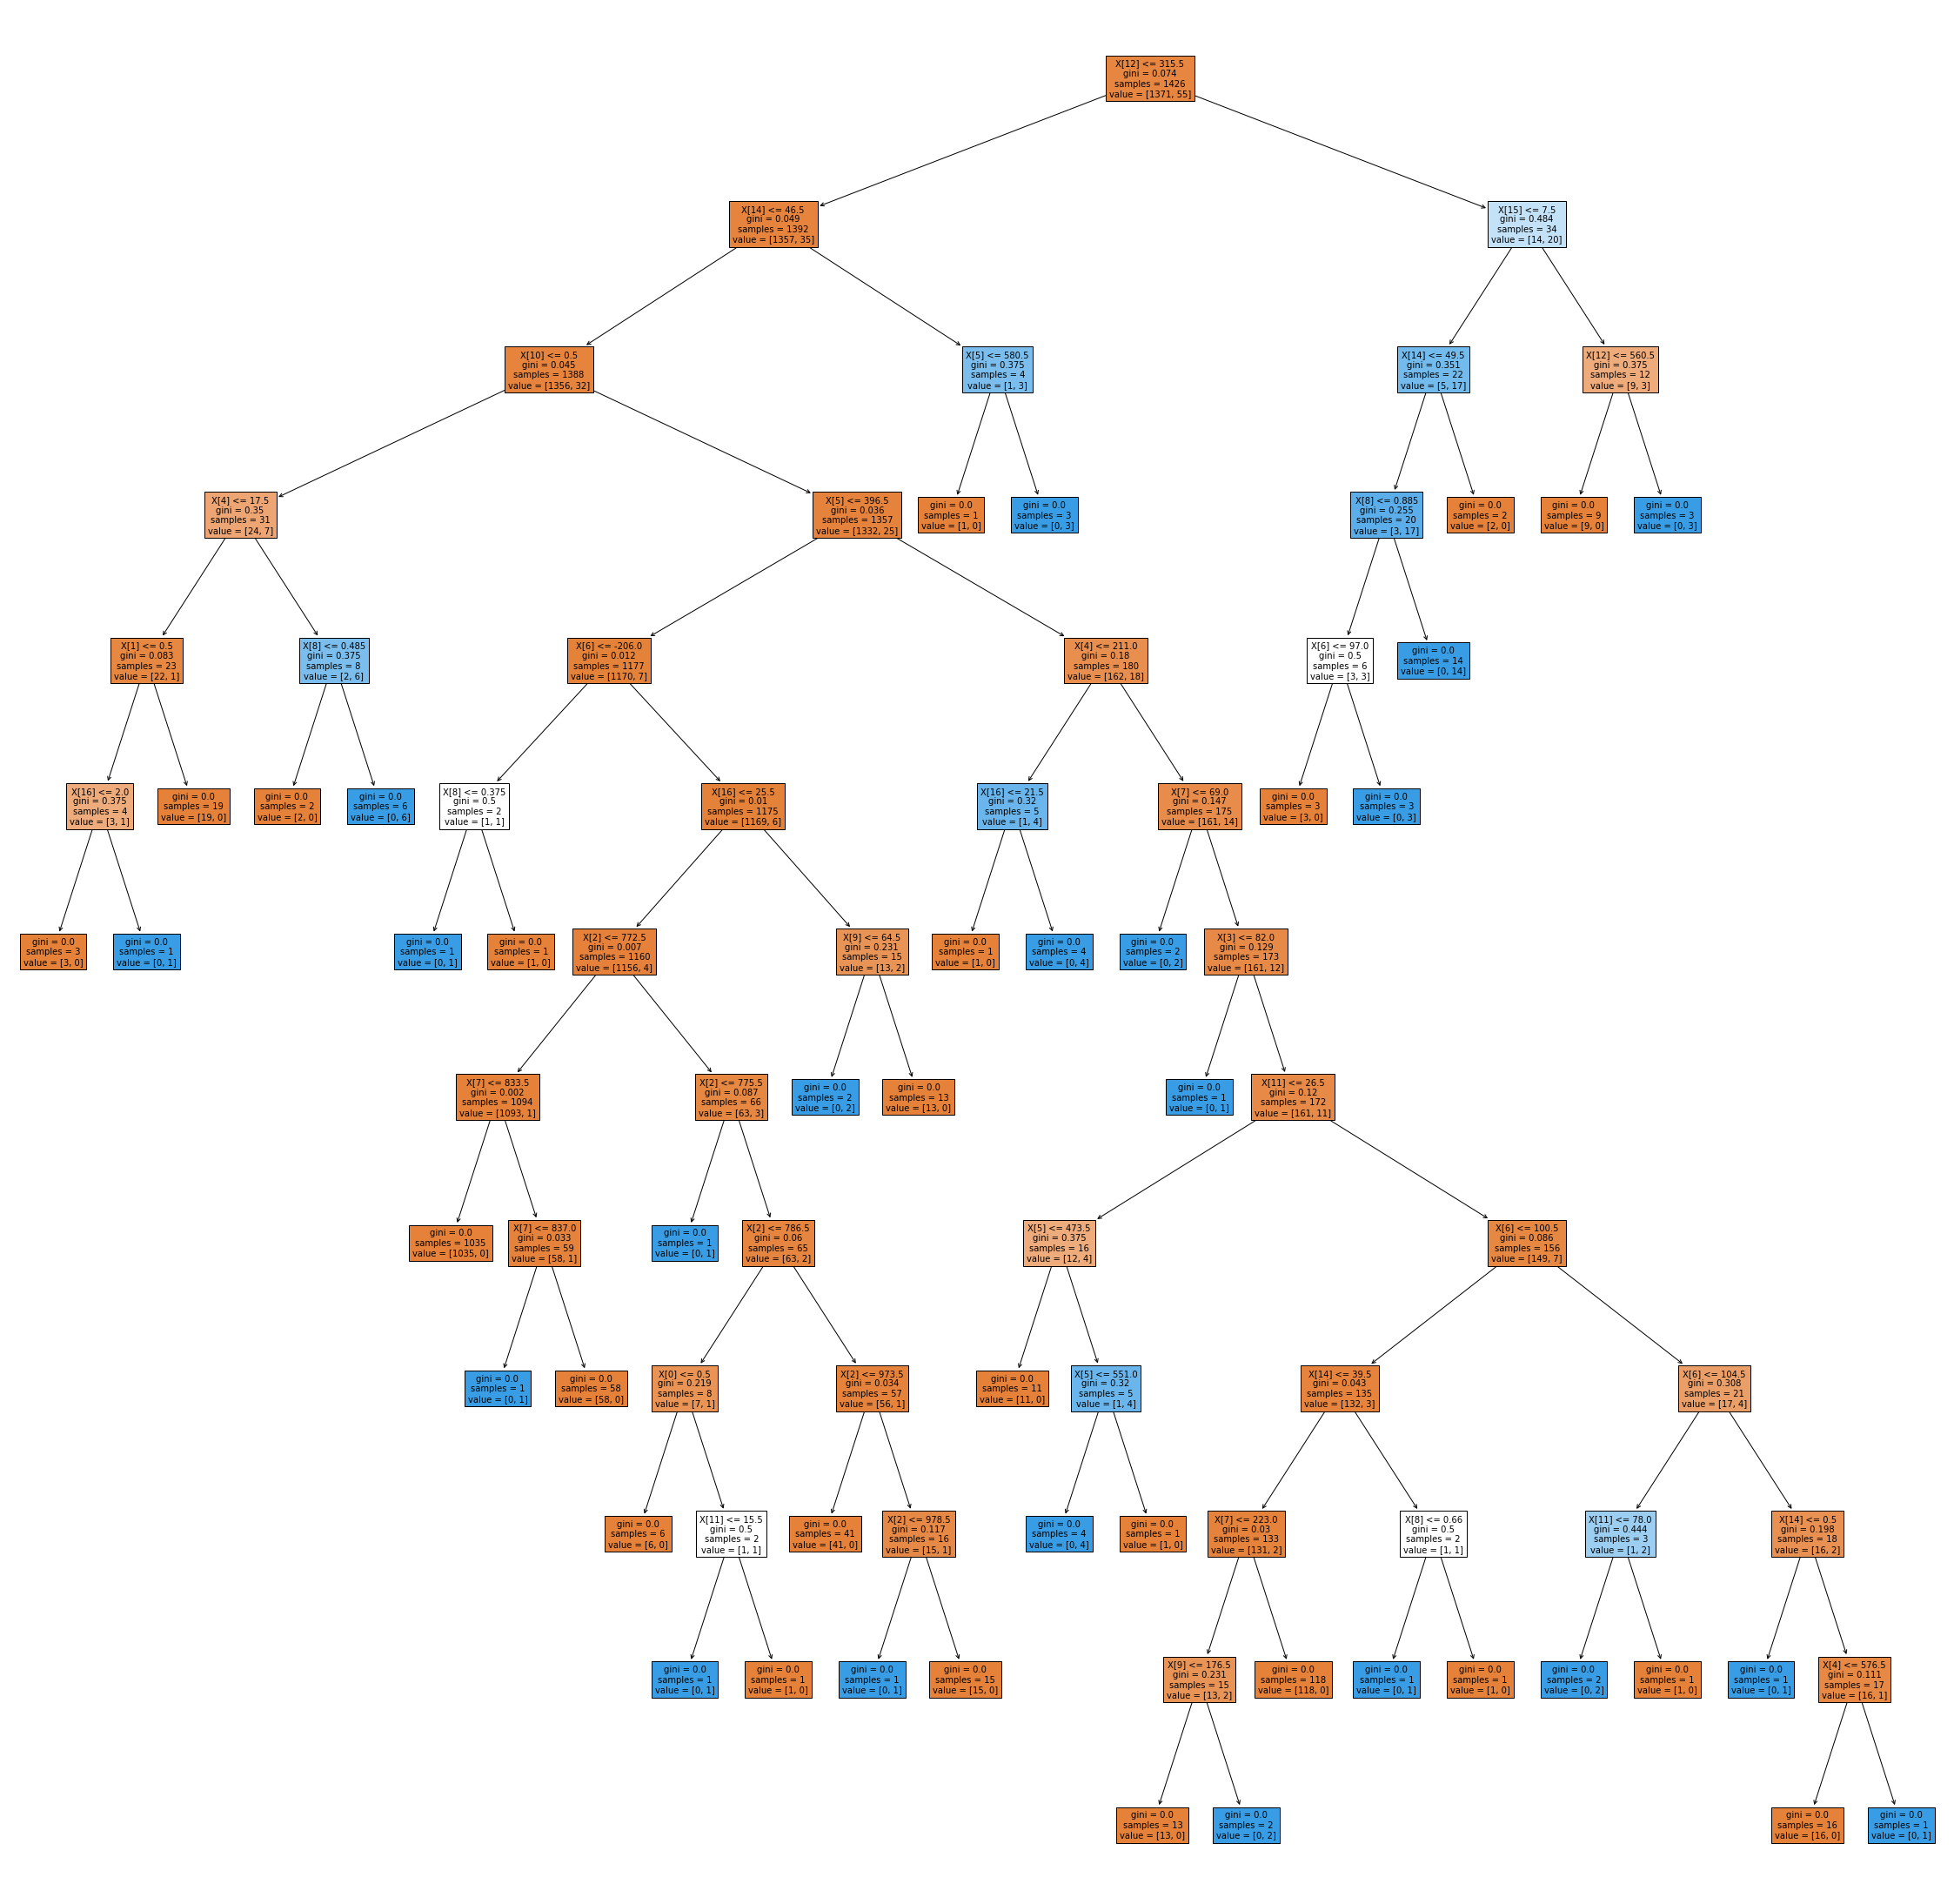

In [26]:
dashboard = widgets.VBox([dropdownModel, tab])
display(dashboard)